In [140]:
# Pandas Basics
from IPython.display import Image 
from matplotlib import font_manager, rc
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [60]:
df = pd.read_excel("data/corona_data.xlsx", sheet_name = "01_지역별소비유형별개인신용카드(결론)")
df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,538807655,550072383,605221466,44936072,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,81715140,79868221,85135882,6717820,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,15874290,14187834,17180576,1259884,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777


> 업종 대분류/소분류 구분

In [225]:
gubun = list()

for idx in range(len(df['소비유형코드'])):
    if df['소비유형코드'].str[:2][idx] == '  ':
        gubun.append('소분류')
    else:
        gubun.append('대분류')

df['구분코드'] = gubun
df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,...,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,538807655,550072383,605221466,44936072,...,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,4.490064e+07,NaN
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,...,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류,1.475554e+06,NaN
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,81715140,79868221,85135882,6717820,...,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,6.809595e+06,NaN
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,...,235818,249490,238870,250262,235457,246281,223755,대분류,2.238590e+05,NaN
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,15874290,14187834,17180576,1259884,...,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,1.322858e+06,NaN


In [241]:
# for문으로 대분류 소비유형코드 붙이기
merc_dae = list()

for x in range(len(df)):
    if df['구분코드'][x]=='대분류':
        merc_dae.append(df['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
df['대분류'] = merc_dae
df = df.fillna(method='ffill')
df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,...,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,538807655,550072383,605221466,44936072,...,50710469,53469616,53827378,53993508,54539492,47029608,대분류,4.490064e+07,NaN,합계
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,...,1690349,1724826,1794246,1741726,1759338,1679629,대분류,1.475554e+06,NaN,합계
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,81715140,79868221,85135882,6717820,...,7484689,7404979,7507863,7299173,7634707,6265129,대분류,6.809595e+06,NaN,종합소매
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,...,249490,238870,250262,235457,246281,223755,대분류,2.238590e+05,NaN,종합소매
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,15874290,14187834,17180576,1259884,...,1485330,1720790,1780818,1650980,1604401,1286777,소분류,1.322858e+06,NaN,종합소매


> 소비유형코드 - 업종 : 인덱스로 설정

In [242]:
set_df = df.set_index(['소비유형코드'])
set_df.head()

,통계표,지역코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,2019/02,...,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,538807655,550072383,605221466,44936072,38921767,...,50710469,53469616,53827378,53993508,54539492,47029608,대분류,4.490064e+07,NaN,합계
합계,7.5.2. 지역별 소비유형별 개인 신용카드,전국,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,1390063,...,1690349,1724826,1794246,1741726,1759338,1679629,대분류,1.475554e+06,NaN,합계
종합소매,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,81715140,79868221,85135882,6717820,6046211,...,7484689,7404979,7507863,7299173,7634707,6265129,대분류,6.809595e+06,NaN,종합소매
종합소매,7.5.2. 지역별 소비유형별 개인 신용카드,전국,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,215936,...,249490,238870,250262,235457,246281,223755,대분류,2.238590e+05,NaN,종합소매
백화점,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,15874290,14187834,17180576,1259884,1145085,...,1485330,1720790,1780818,1650980,1604401,1286777,소분류,1.322858e+06,NaN,종합소매


In [243]:
df_new = set_df[set_df['금액구분코드'] == '총액']
df_new = df_new[df_new['지역코드'] == '전국']
df_new.head()

,통계표,지역코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,2019/02,...,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,538807655,550072383,605221466,44936072,38921767,...,50710469,53469616,53827378,53993508,54539492,47029608,대분류,4.490064e+07,NaN,합계
종합소매,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,81715140,79868221,85135882,6717820,6046211,...,7484689,7404979,7507863,7299173,7634707,6265129,대분류,6.809595e+06,NaN,종합소매
백화점,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,15874290,14187834,17180576,1259884,1145085,...,1485330,1720790,1780818,1650980,1604401,1286777,소분류,1.322858e+06,NaN,종합소매
대형마트/유통전문점,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,33366586,34450924,35365355,2656679,2402706,...,3108158,2928618,2988072,2923811,3165932,2575148,소분류,2.780549e+06,NaN,종합소매
슈퍼마켓,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,21352913,21209923,21489167,1958044,1746519,...,1910003,1763608,1762762,1775922,1942293,1565735,소분류,1.779409e+06,NaN,종합소매


>사용 안하는 데이터 삭제

In [244]:
del df_new['통계표']
del df_new['단위']
del df_new['변환']

In [245]:
df_new.head()

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,538807655,550072383,605221466,44936072,38921767,44496876,43591233,46109266,...,50710469,53469616,53827378,53993508,54539492,47029608,대분류,4.490064e+07,NaN,합계
종합소매,전국,총액,81715140,79868221,85135882,6717820,6046211,6697911,6616299,7113120,...,7484689,7404979,7507863,7299173,7634707,6265129,대분류,6.809595e+06,NaN,종합소매
백화점,전국,총액,15874290,14187834,17180576,1259884,1145085,1351477,1279599,1390518,...,1485330,1720790,1780818,1650980,1604401,1286777,소분류,1.322858e+06,NaN,종합소매
대형마트/유통전문점,전국,총액,33366586,34450924,35365355,2656679,2402706,2609639,2551294,2790584,...,3108158,2928618,2988072,2923811,3165932,2575148,소분류,2.780549e+06,NaN,종합소매
슈퍼마켓,전국,총액,21352913,21209923,21489167,1958044,1746519,1870629,1892572,1969621,...,1910003,1763608,1762762,1775922,1942293,1565735,소분류,1.779409e+06,NaN,종합소매


>연도별 월평균 매출액 칼럼 생성

In [246]:
df_new['19년월평균매출액'] = df_new['19년'] / 12
df_new['20년월평균매출액'] = df_new['20년'] / 12
df_new['21년월평균매출액'] = df_new['21년'] / 12
df_new.head()

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/11,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류,20년월평균매출액,21년월평균매출액
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,538807655,550072383,605221466,44936072,38921767,44496876,43591233,46109266,...,53827378,53993508,54539492,47029608,대분류,4.490064e+07,NaN,합계,4.583937e+07,5.043512e+07
종합소매,전국,총액,81715140,79868221,85135882,6717820,6046211,6697911,6616299,7113120,...,7507863,7299173,7634707,6265129,대분류,6.809595e+06,NaN,종합소매,6.655685e+06,7.094657e+06
백화점,전국,총액,15874290,14187834,17180576,1259884,1145085,1351477,1279599,1390518,...,1780818,1650980,1604401,1286777,소분류,1.322858e+06,NaN,종합소매,1.182320e+06,1.431715e+06
대형마트/유통전문점,전국,총액,33366586,34450924,35365355,2656679,2402706,2609639,2551294,2790584,...,2988072,2923811,3165932,2575148,소분류,2.780549e+06,NaN,종합소매,2.870910e+06,2.947113e+06
슈퍼마켓,전국,총액,21352913,21209923,21489167,1958044,1746519,1870629,1892572,1969621,...,1762762,1775922,1942293,1565735,소분류,1.779409e+06,NaN,종합소매,1.767494e+06,1.790764e+06


In [247]:
df_new['19_20증감'] = (df_new['20년월평균매출액'] - df_new['19년월평균매출액']) / df_new['19년월평균매출액'] * 100
df_new['20_21증감'] = (df_new['21년월평균매출액'] - df_new['20년월평균매출액']) / df_new['20년월평균매출액'] * 100
df_new.head()

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류,20년월평균매출액,21년월평균매출액,20_21증감
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,538807655,550072383,605221466,44936072,38921767,44496876,43591233,46109266,...,53993508,54539492,47029608,대분류,4.490064e+07,2.090677,합계,4.583937e+07,5.043512e+07,10.025787
종합소매,전국,총액,81715140,79868221,85135882,6717820,6046211,6697911,6616299,7113120,...,7299173,7634707,6265129,대분류,6.809595e+06,-2.260192,종합소매,6.655685e+06,7.094657e+06,6.595441
백화점,전국,총액,15874290,14187834,17180576,1259884,1145085,1351477,1279599,1390518,...,1650980,1604401,1286777,소분류,1.322858e+06,-10.623820,종합소매,1.182320e+06,1.431715e+06,21.093720
대형마트/유통전문점,전국,총액,33366586,34450924,35365355,2656679,2402706,2609639,2551294,2790584,...,2923811,3165932,2575148,소분류,2.780549e+06,3.249772,종합소매,2.870910e+06,2.947113e+06,2.654300
슈퍼마켓,전국,총액,21352913,21209923,21489167,1958044,1746519,1870629,1892572,1969621,...,1775922,1942293,1565735,소분류,1.779409e+06,-0.669651,종합소매,1.767494e+06,1.790764e+06,1.316572


## <font color = 'cyan'> 요온 Version

>대분류 업종만 분류!

In [284]:
df_big_dvcd = df_new[df_new['구분코드'] == '대분류']
하위업종_19_20 = df_big_dvcd['19_20증감'].sort_values()
하위업종_19_20[:3]
# 여행/교통   의류/잡화   교육

>(대분류)최종 box plot 그리기

In [285]:
# 나중에 함수 사용 시, df_new 데이터 사용하면 된다!
def big_box_plot_show(gubun):
    top_df = df_big_dvcd.loc[[gubun]]

    amt = top_df.iloc[0,5:43]

    data = {'연도' : ['19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년',
                      '20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년',
                      '21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년',
                      '22년','22년'],
           '매출액' : amt}
    frame = DataFrame(data)
    frame
    
    sns.boxplot(y='매출액',x='연도',palette='Set3',data=frame)
    plt.show()

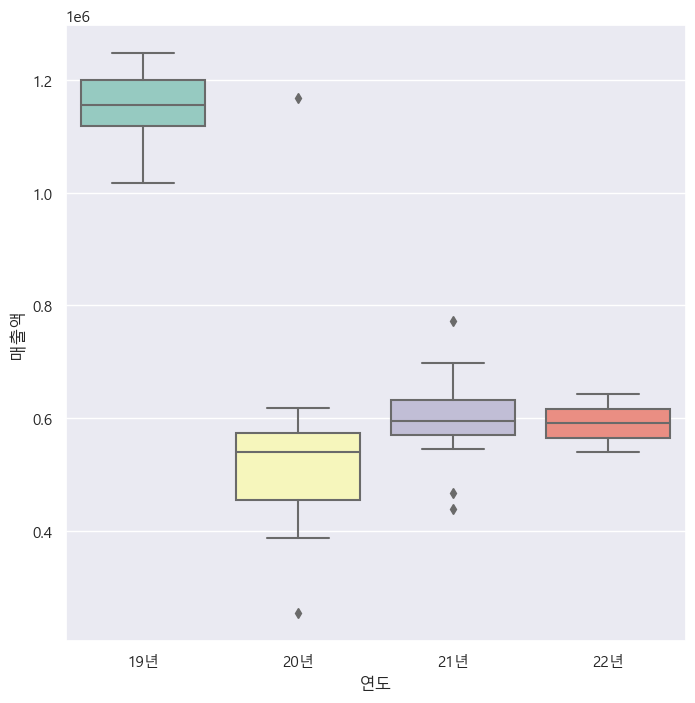

In [289]:
# 여행/교통   의류/잡화   교육
big_box_plot_show('여행/교통')

>소분류 업종 상세 분석

In [288]:
df_small_dvcd = df_new[df_new['대분류'] == '여행/교통']
df_small_dvcd = df_small_dvcd[df_small_dvcd['구분코드'] == '소분류']
df_small_dvcd
# 하위업종_19_20 = df_small_dvcd['19_20증감'].sort_values()
# 하위업종_19_20
# 항공사   여행사/자동차임대   대중교통

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류,20년월평균매출액,21년월평균매출액,20_21증감
소비유형코드,,,,,,,,,,,,,,,,,,,,,
여행사/자동차임대,전국,총액,1531625,478723,466608,172400,116224,119684,121724,130416,...,39283,41570,37589,소분류,127635.416667,-68.744112,여행/교통,39893.583333,38884.00,-2.530691
항공사,전국,총액,5100336,687330,1062213,503956,423982,443476,445981,447640,...,58738,100970,90588,소분류,425028.000000,-86.523829,여행/교통,57277.500000,88517.75,54.541923
대중교통,전국,총액,7200239,5440675,5649270,570806,507773,547363,600598,610105,...,522851,499884,411769,소분류,600019.916667,-24.437578,여행/교통,453389.583333,470772.50,3.833991


>(소분류)최종 box plot 그리기

In [335]:
# 나중에 함수 사용 시, df_new 데이터 사용하면 된다!
def small_box_plot_show(gubun,small_gubun):
    top_df  = df_small_dvcd[df_small_dvcd['대분류'] == gubun]
    top_df1 = top_df.loc[['  ' + small_gubun]]
    
    amt = top_df1.iloc[0,5:43]

    data = {'연도' : ['19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년',
                      '20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년',
                      '21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년',
                      '22년','22년'],
           '매출액' : amt}
    frame = DataFrame(data)
    frame
    
    sns.boxplot(y='매출액',x='연도',palette='Set3',data=frame)
    plt.show()

C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


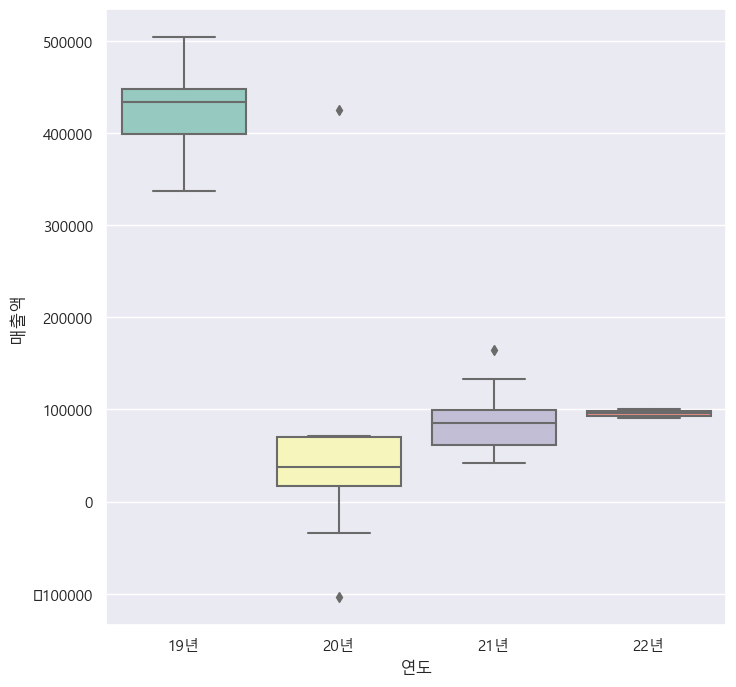

In [336]:
# 항공사   여행사/자동차임대   대중교통
small_box_plot_show('여행/교통','항공사')

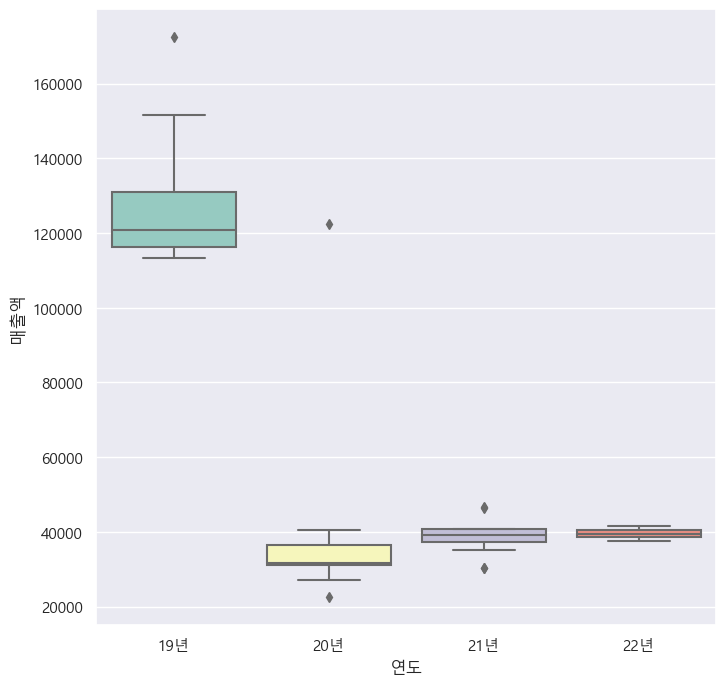

In [338]:
small_box_plot_show('여행/교통','여행사/자동차임대')

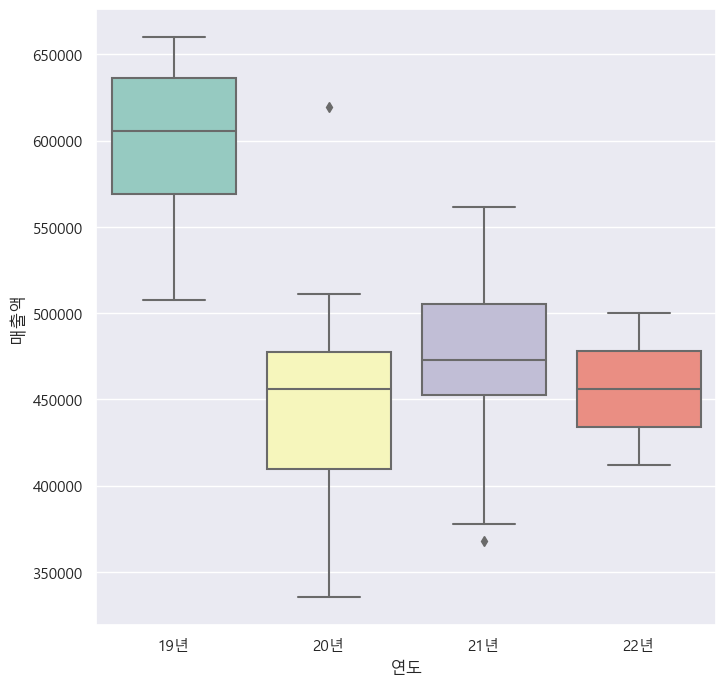

In [337]:
small_box_plot_show('여행/교통','대중교통')

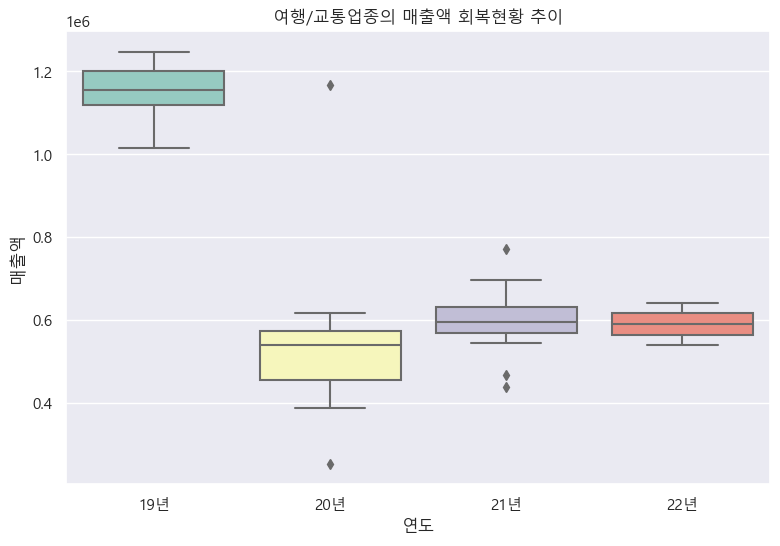

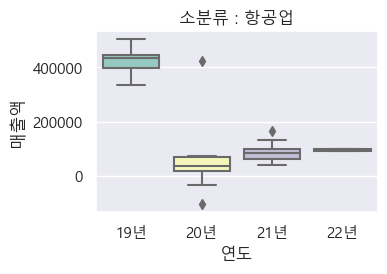

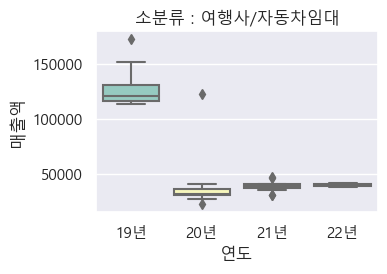

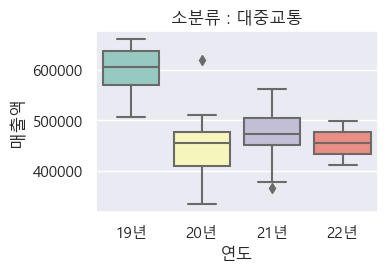

In [348]:
plt.figure(figsize = (20,20))

plt.subplot(322)
plt.title('여행/교통업종의 매출액 회복현황 추이')
big_box_plot_show('여행/교통')

plt.subplot(321)
plt.title('소분류 : 항공업')
small_box_plot_show('여행/교통','항공사')

plt.subplot(322)
plt.title('소분류 : 여행사/자동차임대')
small_box_plot_show('여행/교통','여행사/자동차임대')

plt.subplot(323)
plt.title('소분류 : 대중교통')
small_box_plot_show('여행/교통','대중교통')

plt.show()

## <font color = 'cyan'> 성실이누나 Version

In [353]:
df_small_dvcd = df_new[df_new['대분류'] == '여행/교통']
df_small_dvcd = df_small_dvcd[df_small_dvcd['구분코드'] == '소분류']
df_small_dvcd

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/12,2022/01,2022/02,구분코드,19년월평균매출액,19_20증감,대분류,20년월평균매출액,21년월평균매출액,20_21증감
소비유형코드,,,,,,,,,,,,,,,,,,,,,
여행사/자동차임대,전국,총액,1531625,478723,466608,172400,116224,119684,121724,130416,...,39283,41570,37589,소분류,127635.416667,-68.744112,여행/교통,39893.583333,38884.00,-2.530691
항공사,전국,총액,5100336,687330,1062213,503956,423982,443476,445981,447640,...,58738,100970,90588,소분류,425028.000000,-86.523829,여행/교통,57277.500000,88517.75,54.541923
대중교통,전국,총액,7200239,5440675,5649270,570806,507773,547363,600598,610105,...,522851,499884,411769,소분류,600019.916667,-24.437578,여행/교통,453389.583333,470772.50,3.833991


In [351]:
    top_df  = df_small_dvcd[df_small_dvcd['대분류'] == gubun]
    top_df1 = top_df.loc[['  ' + small_gubun]]

소비유형코드
여행/교통   -52.236600
의류/잡화   -17.303131
교육      -16.836517
Name: 19_20증감, dtype: float64